## Data Preparation Tasks
After we have seen how our data looks, next we need to spend some time preparing our data for use.  This means we need to ensure that the data types are correct, that we have dealt with "dirty" data (missing fields, outliers, unary values), and possibly creating new factors which can enhance predictive models or better explain the data we have. 


* [ X ] Dealing with missing data 
  - [ X ] Replacing with userdefined value
  - [ X ] Mean/median/mode
  - [ X ] Random value

* [X] Filtering inappropriate values
* [ ] Feature selection (removing unary features/columns)
* [ ] Discretizing (binning)
* [ ] Converting categorical values to numeric
* [ ] Standardizing values (z-score standardization)
* [ ] Normalizing values (min/max normalization)


In [3]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from pathlib import Path

#import dmba

DATA_DIR = Path('../data')
plt.style.use('dark_background')


### Missing data

Missing data can be fields that are represented as NULL, Na, NaN (not a number), blanks or it could even just plain wrong (like a number where you expect a string or a string where you expect a number).  All of these situations can be handled similarly.  Fortunately, the `pandas` library gives us some tools to deal with them.

In [5]:
# Load the dirty_cereal dataset

dirty_cereal_df = pd.read_csv(DATA_DIR/'cereals_dirty.csv')
dirty_cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,NaN,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [ ]:
# So it seems we have some null or NaN fields, how should we proceed
# We could replace the values
new_cereal_df = dirty_cereal_df.copy(deep=True)
# Find all the fields with an na or null and replace with 0
# Notice .loc allows us to access a set of rows/columns by label or boolean
new_cereal_df.loc[new_cereal_df.carbo.isna()] = 0
# We could also replace with the mean/median
new_cereal_df.loc[new_cereal_df.carbo.isna()] = new_cereal_df['carbo'].mean()

In [ ]:
# We can drop a set of rows where *any* or *all* of the values are null
new_cereal_df.dropna(axis='rows',subset=['carbo'])
# We could also just filter this value out
new_cereal_df = new_cereal_df[~new_cereal_df['carbo'].isna()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,NaN,0.33,68.402973
1,100%_Natural_Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
4,Almond_Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,NaN,25.0,3.0,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3.0,1.0,0.75,39.106174
73,Trix,G,C,110.0,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2.0,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100.0,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1.0,1.0,0.67,49.787445
75,Wheaties,G,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1.0,1.0,1.00,51.592193


Your turn
---------
There are several other issues in this dataset like 
- Sugars and potass also have 0/null values
- there is a calorie number < 0
- the manufacturer codes include K, G, P etc, but also Post and Kellogg how to deal?
- some rows have weight = 0 or na, should we drop them? or replace them with mean values?

In [ ]:
# TODO: What about sugars and potass these have 0/null values
# TODO: Decide what to do about calorie number <= 0
# TODO: Deal with Post, Kellogg
# TODO: Deal with missing weight

### Filtering inappropriate values
Let's check out our data and see if we can find any outliers or maybe inappropriate values.  We'll start by checking the datatype of each column

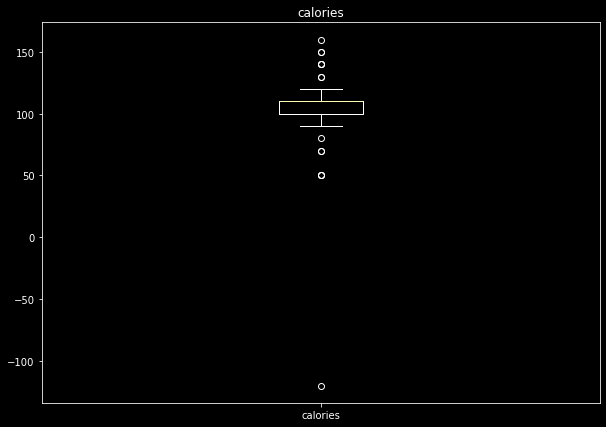

In [14]:
# Let's get a box plot for a numerical column

fig = plt.figure(figsize=(10,7))
plt.boxplot(dirty_cereal_df['calories'], labels=['calories'])
#plt.boxplot(dirty_cereal_df[['calories','sugars']], labels='calories'])
plt.title('calories')
plt.show()

Seaborn allows us to do a similar chart

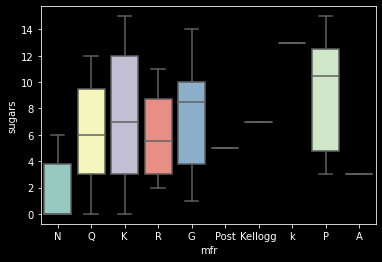

In [8]:
# Also we can do this with seaborn
# Notice the [[]] indexing method, this says return the result as a dataframe rather than a series
sns.boxplot(data=dirty_cereal_df[['sugars','mfr']],x='mfr',y='sugars');

So now it's clear that have an issue with calories.  You might want to check the other columns or maybe just do a visual scan of the columns to see what else might be a problem.

The next step is to figure out what to do with this data.  Usually we don't want to eliminate it from the source data and it might be helpful in our actual dataset - so we can simply filter out the bad rows or we can replace them.

In [ ]:
# TODO: Replace the calories that are negative with the positive value

In [15]:
dirty_cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,72.000000,76.000000,75.000000,77.000000,77.000000,74.000000,77.000000,77.000000
mean,103.766234,2.545455,1.012987,159.675325,2.151948,14.875000,7.026316,98.666667,28.246753,2.207792,1.026351,0.821039,42.665705
std,32.323975,1.094790,1.006473,83.832295,2.383364,3.944822,4.378656,70.410636,22.342523,0.832524,0.149342,0.232716,14.047289
min,-120.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,15.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#### Discretizing / Binning
Sometimes, it might be helpful to have categories for the ranges of values rather than just the value themselves.  For instance, if we are looking at the cereal example, it might be helpful to determine that cereal with a low calorie count vs a high calorie count

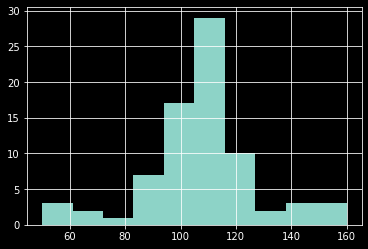

In [17]:
# Notice here we are using panda directly, 
#  pandas has a built-in set of visualizations
#  which can help us to clean up our code just a bit and make it easier to follow.
cereal_df = pd.read_csv(DATA_DIR/'cereals.csv')
cereal_df.calories.hist();


In [ ]:
# How about we create a category for these fields instead
cereal_df['calorie_groups'] = pd.qcut(cereal_df.calories,q=4,duplicates='drop')
cereal_df.calorie_groups.value_counts()

(49.999, 100.0]    30
(100.0, 110.0]     29
(110.0, 160.0]     18
Name: calorie_groups, dtype: int64